<a href="https://colab.research.google.com/github/rahmaashraf310/Heart_Disease_Project/blob/main/notebooks/02_pca_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape: (303, 14)
Processed feature matrix shape: (303, 20)


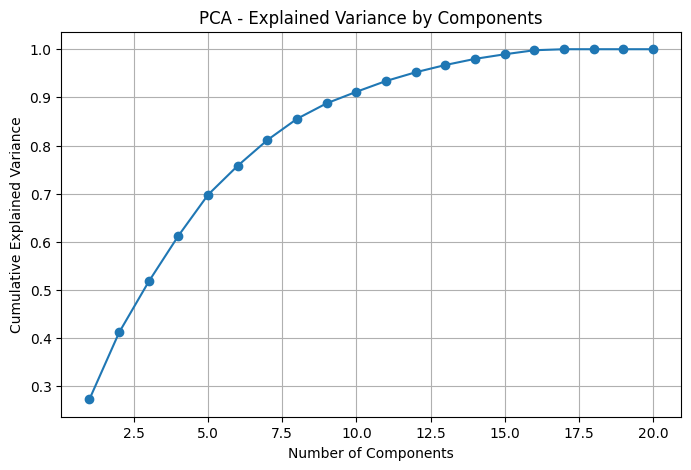

Original shape: (303, 20)
Reduced shape: (303, 10)


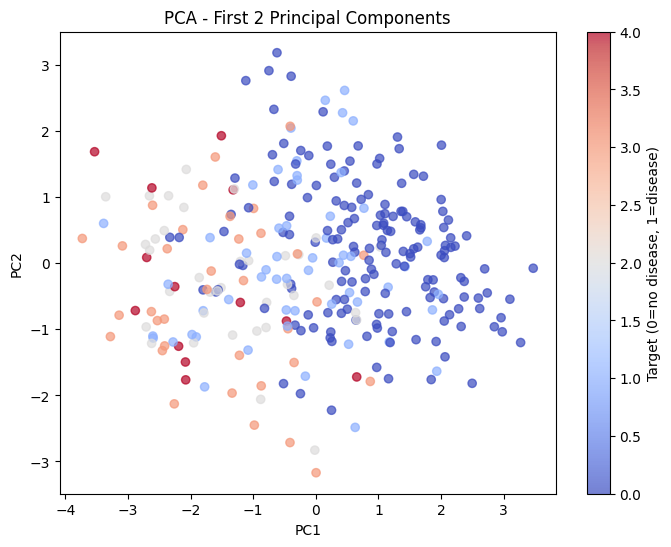

✅ PCA-transformed dataset saved to results/pca_transformed.csv


In [ ]:
# =============================================
# Heart Disease Project — Step 2.2 PCA Analysis
# =============================================

# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Load preprocessor from Step 1
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# 2. Load cleaned dataset
df = pd.read_csv("data/heart_clean.csv")
print("Shape:", df.shape)
df.head()

# 3. Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# 4. Define columns (same as before)
numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]
binary_features = ["sex", "fbs", "exang"]
nominal_features = ["cp", "restecg", "thal"]
ordinal_features = ["slope"]

slope_order = [[1, 2, 3]]

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
binary_transformer = "passthrough"
nominal_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
ordinal_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ordinal", OrdinalEncoder(categories=slope_order))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("bin", binary_transformer, binary_features),
    ("nom", nominal_transformer, nominal_features),
    ("ord", ordinal_transformer, ordinal_features)
])

# 5. Transform dataset
X_processed = preprocessor.fit_transform(X)
print("Processed feature matrix shape:", X_processed.shape)

# 6. Apply PCA
pca = PCA().fit(X_processed)

# 7. Explained variance plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(),
         marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance by Components")
plt.grid(True)
plt.show()

# 8. Choose components to retain ~90% variance
pca_90 = PCA(n_components=0.90)
X_pca = pca_90.fit_transform(X_processed)
print("Original shape:", X_processed.shape)
print("Reduced shape:", X_pca.shape)

# 9. 2D scatter plot of first 2 PCs
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - First 2 Principal Components")
plt.colorbar(label="Target (0=no disease, 1=disease)")
plt.show()

# 10. Save PCA-transformed dataset
import numpy as np
pca_df = pd.DataFrame(X_pca)
pca_df["target"] = y.reset_index(drop=True)
pca_df.to_csv("results/pca_transformed.csv", index=False)
print("✅ PCA-transformed dataset saved to results/pca_transformed.csv")
